# 1. Project Overview

## Background and Motivation

This Project is a Harvard CS course project.

According to the U.S. Department of Energy, **buildings consume about 40% of all energy** used in the US. 

Acting on this can help acting on climate change.


In this project, we will apply **machine learning** methods to **predict energy demand of buildings based on time, weather and historical data**. 

This type of modeling is frequently applied to energy demand prediction for smart grid technologies and energy saving verification for building commissioning. 

In the past, Neural Networks were most commonly used for these tasks. We would like to apply more machine learning methods to such prediction.


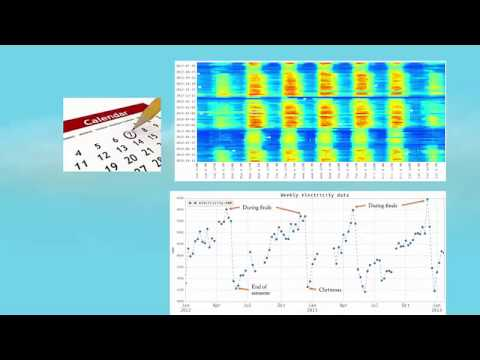

In [119]:
from IPython.display import YouTubeVideo
YouTubeVideo('JiAQxctOntQ')

# 2. Data Wrangling

For some large scale buildings in Harvard, <b>there are three types energy consumption, electricity, chilled water and steam. Chilled water is for cooling and steam is for heating</b>.

<img src="Pics/chilled water and steam.jpg", style="width:50%">

We picked one building and got energy consumption data **from 2011/07/01 to 2014/10/31**. 

# 3. Exploratory Data Analysis

In [4]:
%matplotlib inline 

import numpy as np
import numpy.linalg as lin # module for performing linear algebra operations
import pandas as pd # pandas
from sklearn.linear_model import LinearRegression
import datetime as dt # module for manipulating dates and times
from __future__ import division
import matplotlib
import matplotlib.pyplot as plt # module for plotting 
import pprint
pp = pprint.PrettyPrinter()

from helpers.plot import relationship_plot
from helpers.data import df, column_details

matplotlib.pyplot.style.use('seaborn')

In [5]:
df.head()

,electricity-kWh,chilledWater-TonDays,steam-LBS,RH-%,T-C,Tdew-C,pressure-mbar,solarRadiation-W/m2,windDirection,windSpeed-m/s,humidityRatio-kg/kg,coolingDegrees,heatingDegrees,dehumidification,occupancy,weekday,day,week
index,,,,,,,,,,,,,,,,,,
2012-01-01,2800.244977,0.961857,17256.468099,76.652174,7.173913,3.073913,1004.956522,95.260870,236.086957,4.118361,0.004796,0.0,7.826087,0.0,0.0,6,1,52
2012-01-02,3168.974047,0.981725,17078.440755,55.958333,5.833333,-2.937500,994.625000,87.333333,253.750000,5.914357,0.003415,0.0,9.166667,0.0,0.3,0,2,1
2012-01-03,5194.533376,1.003672,59997.969401,42.500000,-3.208333,-12.975000,1002.125000,95.708333,302.916667,6.250005,0.001327,0.0,18.208333,0.0,0.3,1,3,1
2012-01-04,5354.861935,1.483192,56104.878906,41.541667,-7.083333,-16.958333,1008.250000,98.750000,286.666667,5.127319,0.000890,0.0,22.083333,0.0,0.3,2,4,1
2012-01-05,5496.223993,3.465091,45231.708984,46.916667,-0.583333,-9.866667,1002.041667,90.750000,258.333333,5.162041,0.001746,0.0,15.583333,0.0,0.3,3,5,1


## Monthly energy consumption
<img src="Pics/monthly_consumption.jpg", style="width:90%">


## Electricity consumption pattern

Electricity shows a strong periodical pattern. You can clearly see the difference between day and night, weekdays and weekends.
<img src="Pics/hourly electricity.png", style="width:50%">


**Exo 1: Plot the Weekly Electricity Consumption**

indication: use the pandas.DataFrame.plot function

**Solution**

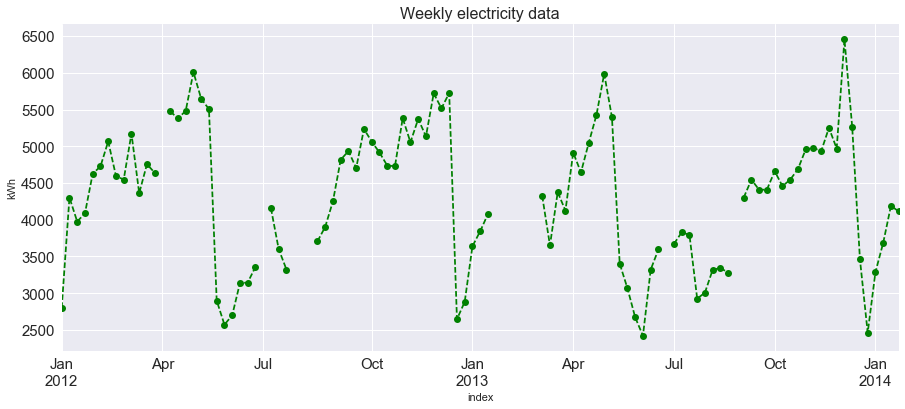

In [123]:
dailyElectricity = df['electricity-kWh']
weeklyElectricity = dailyElectricity.asfreq('W')

fig = weeklyElectricity['2012-01':'2014-01'].plot(
    figsize = (15, 6), 
    fontsize = 15, 
    marker = 'o', 
    linestyle='--', 
    c='g')
plt.title('Weekly electricity data', fontsize = 16)
plt.ylabel('kWh')

It looks like during each semester, electricity use ramps up toward a peak at finals, perhaps representative of studying patterns. The students are working harder and harder toward finals. Then there is a dip after semesters end, including Christmas vacation. The electricity consumption is relatively low during January and summer terms, and spring break, when campus can be relatively empty.

<img src="Pics/Weekly-electricity.jpg", style="width:100%">


## Relationship between energy consumption and features

In [124]:
#Features Description.
pp.pprint(column_details)

{'Humidity ratio': 'Humidity ratio is calcluated based on T-C, RH and '
                   'pressure. Humidity ratio is important for chilled water '
                   'prediction as chilled water is also used to dry the air '
                   'discharged to rooms. Using humidity ratio will be more '
                   'efficient and effective than using RH and dew point '
                   'temperature.',
 'RH-%': 'Relative humidity',
 'T-C': 'Dry-bulb temperature',
 'Tdew-C': 'Dew-point temperature',
 'coolingDegrees': 'if T-C - 12 > 0, then = T-C - 12, else = 0. Assume that '
                   'when outdoor temperature is below 12C, no cooling is '
                   'needed, which is true for many buildings. This will be '
                   'useful for daily prediction, because the average of hourly '
                   'cooling degrees is better than average of hourly '
                   'temperature.',
 'cosHour': '$\text{cos}(\text{hourOfDay} \\cdot \x0crac{2\\pi}{24})$',

**Exo 2: Plot the relationship between energy consumption and humidity.**

indication: use the custom relationship_plot function

indication: you can check what the function does by typing ??relationship_plot

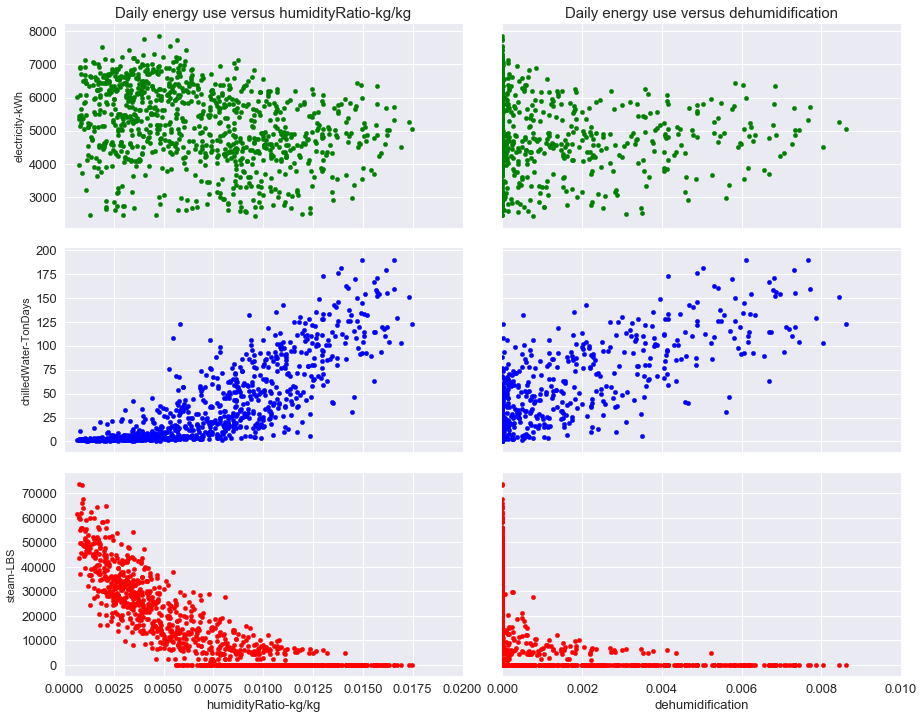

In [126]:
relationship_plot('humidityRatio-kg/kg', 'dehumidification', [0,0.02], [0,0.01])

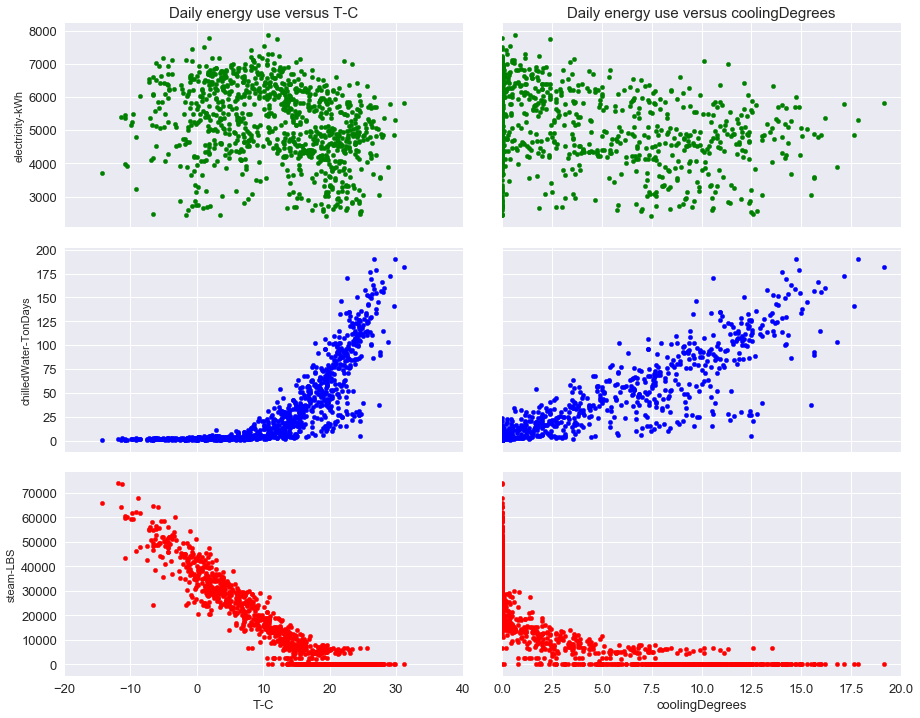

In [125]:
relationship_plot('T-C', 'coolingDegrees', [-20, 40], [0, 20])

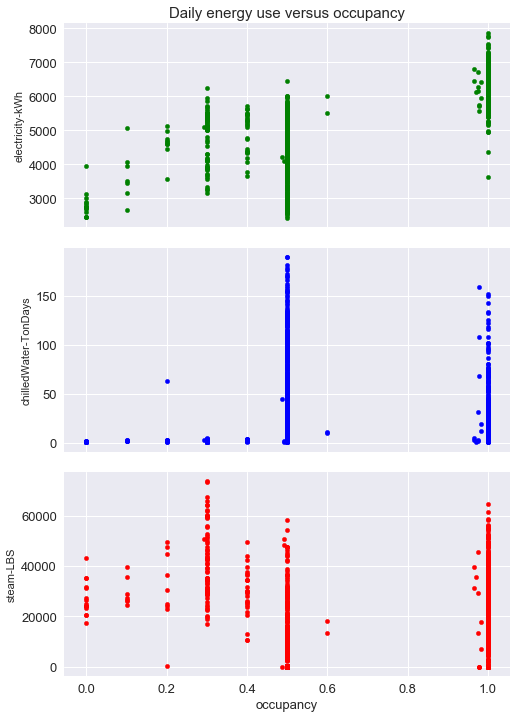

In [127]:
relationship_plot('occupancy')

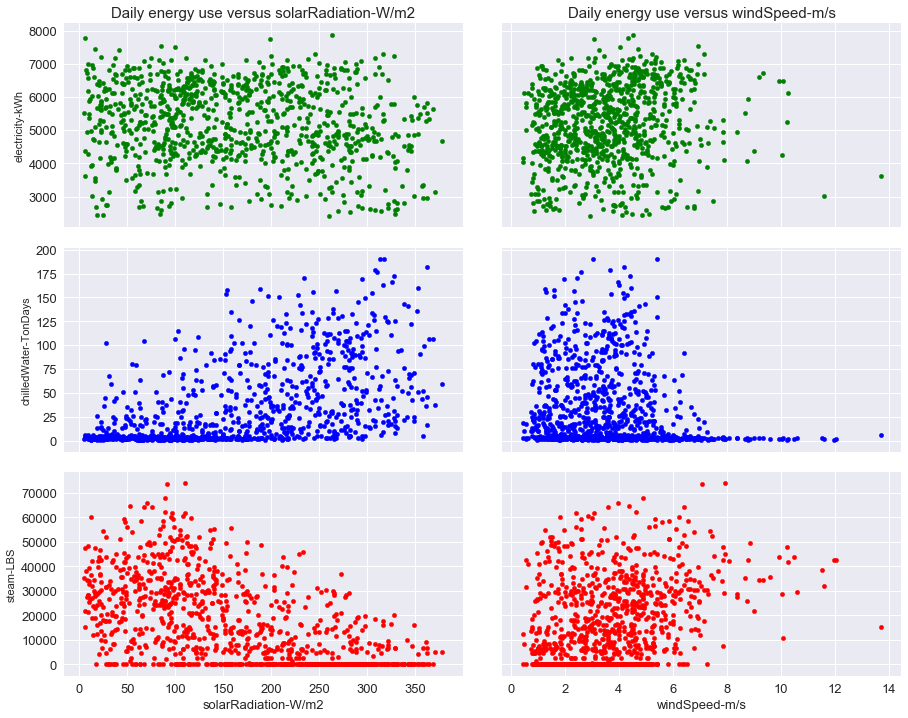

In [128]:
relationship_plot('solarRadiation-W/m2', 'windSpeed-m/s')

**Electricity is not co-related with weather data (temperature)**. The idea of using weather information to predict electricity will NOT work. 

It mostly depends on time/occupancy.

**Chilled water and steam are strongly co-related with temperature and humidity**. Daily chilled water and steam consumption have a good linear relationship with cooling and heating degrees. Therefore, simple linear regression might already be accurate enough.

However, using with weather information to predict hourly chilled water and steam is not sufficient. Occupancy and operation schedule must be included in hourly chilled water and steam prediction.

Humidity ratio definitely will help predict chilled water consumption.

Cooling and heating degrees will help predict daily chilled water and steam.

# 4. Prediction Using Linear Regression

In this notebook, we'll train a Linear Regression model for predicting building energy consumption based on historical enregy data, several weather variables, hour of the day, day of the week, weekends and holidays. 

To do this, we'll fit the model to daily energy and weather data from 2012-01-01 to 2014-10-31. 


In [129]:
from helpers.data import df
df.head()

,electricity-kWh,chilledWater-TonDays,steam-LBS,RH-%,T-C,Tdew-C,pressure-mbar,solarRadiation-W/m2,windDirection,windSpeed-m/s,humidityRatio-kg/kg,coolingDegrees,heatingDegrees,dehumidification,occupancy,weekday,day,week
index,,,,,,,,,,,,,,,,,,
2012-01-01,2800.244977,0.961857,17256.468099,76.652174,7.173913,3.073913,1004.956522,95.260870,236.086957,4.118361,0.004796,0.0,7.826087,0.0,0.0,6,1,52
2012-01-02,3168.974047,0.981725,17078.440755,55.958333,5.833333,-2.937500,994.625000,87.333333,253.750000,5.914357,0.003415,0.0,9.166667,0.0,0.3,0,2,1
2012-01-03,5194.533376,1.003672,59997.969401,42.500000,-3.208333,-12.975000,1002.125000,95.708333,302.916667,6.250005,0.001327,0.0,18.208333,0.0,0.3,1,3,1
2012-01-04,5354.861935,1.483192,56104.878906,41.541667,-7.083333,-16.958333,1008.250000,98.750000,286.666667,5.127319,0.000890,0.0,22.083333,0.0,0.3,2,4,1
2012-01-05,5496.223993,3.465091,45231.708984,46.916667,-0.583333,-9.866667,1002.041667,90.750000,258.333333,5.162041,0.001746,0.0,15.583333,0.0,0.3,3,5,1


## 4.1 Electricity Prediction

In [11]:
from helpers.data import train_test_split
X = df[['weekday', 'day', 'week', 'occupancy']]
y = df['electricity-kWh']
X_train, X_test, y_train, y_test = train_test_split(X, y)

**Exo 3: Fit a Linear Regression to the electricity data given the time and occupancy and get its R²**

indication: use the sklearn.linear_model.LinearRegression class

indication: you can check the methods of the class with autocomplete

In [171]:
lr_elect = LinearRegression()
lr_elect.fit(X_train,y_train)

y_lr = lr_elect.predict(X_test)

print("The test score R2: ", lr_elect.score(X_test, y_test))

print("The Linear Regression coefficients are")
pd.DataFrame(list(zip(X_train.columns, lr_elect.coef_[0])), columns = ['elect_features', 'linearRegr_Coefficients'])

The test score R2:  0.589317579683
The Linear Regression coefficients are


,elect_features,linearRegr_Coefficients
0,weekday,-103.643734
1,day,1.886924
2,week,-16.497164
3,occupancy,2468.016220


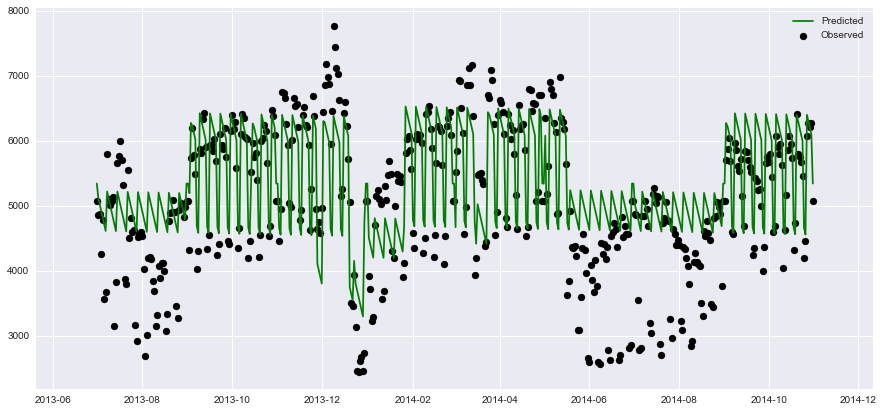

In [175]:
#Plot observed and Predicted electricity value 
fig = plt.figure(figsize=(15,7))
plt.scatter(X_test.index, y_test, label='Observed', color='k')
plt.plot(X_test.index, y_lr, label='Predicted', color='g')
plt.legend(loc='upper right')

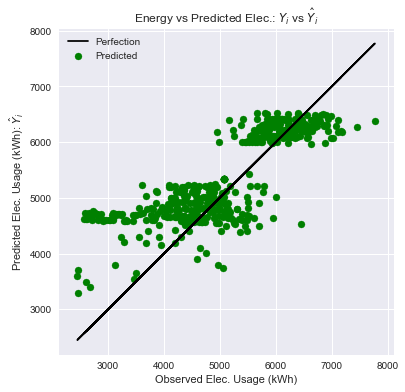

In [180]:
#Plot Observed vs. Linear Regression predicted usage.
fig = plt.figure(figsize=(6,6))
plt.plot(y_test, y_test, label='Perfection', c='k')
plt.scatter(y_test, y_lr, label='Predicted', c='g')
plt.xlabel('Observed Elec. Usage (kWh)')
plt.ylabel("Predicted Elec. Usage (kWh): $\hat{Y}_i$")
plt.title("Energy vs Predicted Elec.: $Y_i$ vs $\hat{Y}_i$")
plt.legend(loc='upper left')

## 4.2 Chilled Water Prediction

**Exo 4: Fit a Linear Regression to the chilled water data given the time and occupancy and get its R²**

indication: adapt the code from before


In [12]:
X = df[['weekday', 'day', 'week', 'occupancy']]
y = df['chilledWater-TonDays']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
lr_elect = LinearRegression()
lr_elect.fit(X_train,y_train)

y_lr = lr_elect.predict(X_test)

print("The test score R2: ", lr_elect.score(X_test, y_test))

print("The Linear Regression coefficients are")
pd.DataFrame(list(zip(X_train.columns, lr_elect.coef_[0])), columns = ['elect_features', 'linearRegr_Coefficients'])

The test score R2:  0.11168574096752493
The Linear Regression coefficients are


,elect_features,linearRegr_Coefficients
0,weekday,-4.506175
1,day,0.177772
2,week,-0.512499
3,occupancy,-33.638935


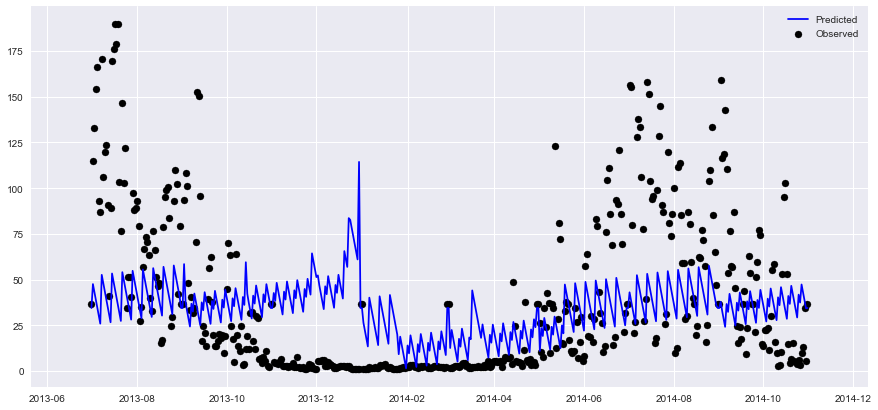

In [14]:
#Plot observed and Predicted electricity value 
fig = plt.figure(figsize=(15,7))
plt.scatter(X_test.index, y_test, label='Observed', color='k')
plt.plot(X_test.index, y_lr, label='Predicted', color='b')
plt.legend(loc='upper right')

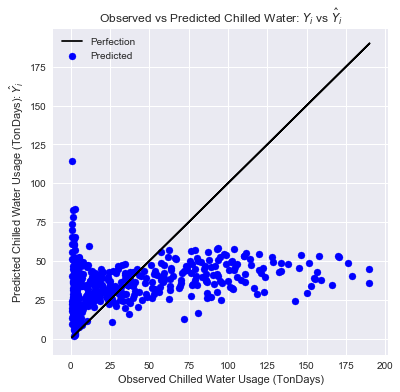

In [15]:
#Plot Observed vs. Linear Regression predicted usage.
fig = plt.figure(figsize=(6,6))
plt.plot(y_test, y_test, label='Perfection', c='k')
plt.scatter(y_test, y_lr, label='Predicted', c='b')
plt.xlabel('Observed Chilled Water Usage (TonDays)')
plt.ylabel("Predicted Chilled Water Usage (TonDays): $\hat{Y}_i$")
plt.title("Observed vs Predicted Chilled Water: $Y_i$ vs $\hat{Y}_i$")
plt.legend(loc='upper left')

**Exo 5: Fit a Linear Regression to the chilled water data using all features available and compare the R²**

In [16]:
all_features = [col for col in df.columns if col not in ['electricity-kWh', 'steam-LBS', 'chilledWater-TonDays']]

In [17]:
X = df[all_features]
y = df['chilledWater-TonDays']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
lr_elect = LinearRegression()
lr_elect.fit(X_train,y_train)

y_lr = lr_elect.predict(X_test)

print("The test score R2: ", lr_elect.score(X_test, y_test))

print("The Linear Regression coefficients are")
pd.DataFrame(list(zip(X_train.columns, lr_elect.coef_[0])), columns = ['elect_features', 'linearRegr_Coefficients'])

The test score R2:  0.8298550193225305
The Linear Regression coefficients are


,elect_features,linearRegr_Coefficients
0,RH-%,0.456151
1,T-C,4.923129
2,Tdew-C,-2.661672
3,pressure-mbar,-0.086868
4,solarRadiation-W/m2,0.044143
5,windDirection,-0.024769
6,windSpeed-m/s,-1.128731
7,humidityRatio-kg/kg,2499.217387
8,coolingDegrees,3.869785
9,heatingDegrees,3.158538


## 4.3 Steam Prediction

**Exo 6: Fit a Linear Regression to the steam data and compare the R²**

In [19]:
X = df[all_features]
y = df['steam-LBS']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
lr_elect = LinearRegression()
lr_elect.fit(X_train,y_train)

y_lr = lr_elect.predict(X_test)

print("The test score R2: ", lr_elect.score(X_test, y_test))

print("The Linear Regression coefficients are")
pd.DataFrame(list(zip(X_train.columns, lr_elect.coef_[0])), columns = ['elect_features', 'linearRegr_Coefficients'])

The test score R2:  0.9423989315631714
The Linear Regression coefficients are


,elect_features,linearRegr_Coefficients
0,RH-%,67.065545
1,T-C,649.009607
2,Tdew-C,-970.994036
3,pressure-mbar,-29.960928
4,solarRadiation-W/m2,-18.380946
5,windDirection,-7.724529
6,windSpeed-m/s,251.560418
7,humidityRatio-kg/kg,930240.058200
8,coolingDegrees,-272.306353
9,heatingDegrees,1978.981405


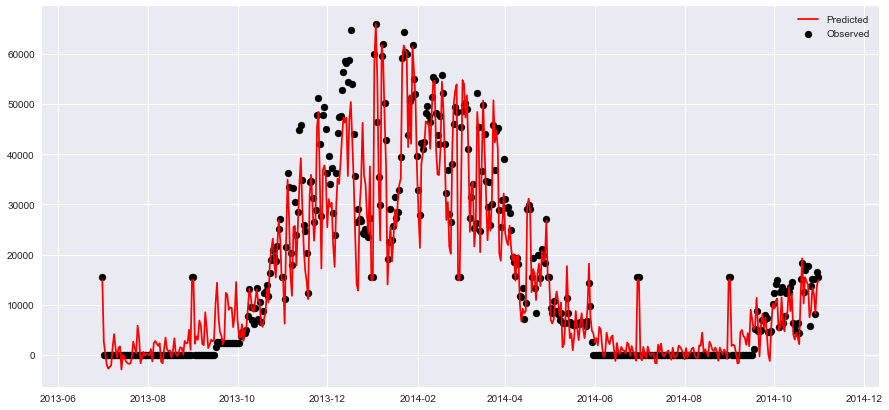

In [21]:
#Plot observed and Predicted electricity value 
fig = plt.figure(figsize=(15,7))
plt.scatter(X_test.index, y_test, label='Observed', color='k')
plt.plot(X_test.index, y_lr, label='Predicted', color='r')
plt.legend(loc='upper right')

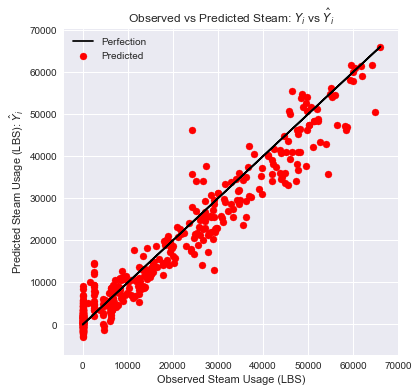

In [22]:
#Plot Observed vs. Linear Regression predicted usage.
fig = plt.figure(figsize=(6,6))
plt.plot(y_test, y_test, label='Perfection', c='k')
plt.scatter(y_test, y_lr, label='Predicted', c='r')
plt.xlabel('Observed Steam Usage (LBS)')
plt.ylabel("Predicted Steam Usage (LBS): $\hat{Y}_i$")
plt.title("Observed vs Predicted Steam: $Y_i$ vs $\hat{Y}_i$")
plt.legend(loc='upper left')

**(Bonus) Exo 7: How much improvement do we get for electricity by using all features?**

In [23]:
X = df[all_features]
y = df['electricity-kWh']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
lr_elect = LinearRegression()
lr_elect.fit(X_train,y_train)

y_lr = lr_elect.predict(X_test)

print("The test score R2: ", lr_elect.score(X_test, y_test))

print("The Linear Regression coefficients are")
pd.DataFrame(list(zip(X_train.columns, lr_elect.coef_[0])), columns = ['elect_features', 'linearRegr_Coefficients'])

The test score R2:  0.6086063393842511
The Linear Regression coefficients are


,elect_features,linearRegr_Coefficients
0,RH-%,10.661259
1,T-C,396.192822
2,Tdew-C,-96.236289
3,pressure-mbar,1.538496
4,solarRadiation-W/m2,0.206555
5,windDirection,-0.338166
6,windSpeed-m/s,-50.516942
7,humidityRatio-kg/kg,28230.199903
8,coolingDegrees,-299.249883
9,heatingDegrees,307.834651


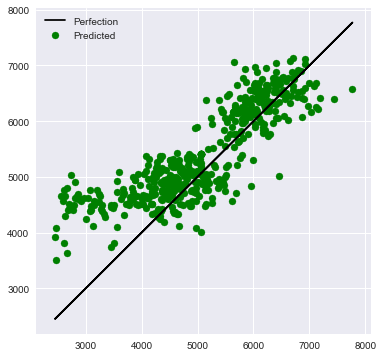

In [25]:
#Plot Observed vs. Linear Regression predicted usage.
fig = plt.figure(figsize=(6,6))
plt.plot(y_test, y_test, label='Perfection', c='k')
plt.scatter(y_test, y_lr, label='Predicted', c='g')
plt.legend(loc='upper left')

# 5. Prediction Using Neural Networks

We've seen that Linear Regression is not so great for Electricity.

It's time to try different models.

In [26]:
X = df[all_features]
y = df['electricity-kWh']
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape

(547, 15)

http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

http://scikit-learn.org/stable/modules/neural_networks_supervised.html#mlp-tips


In [319]:
from sklearn.neural_network import MLPRegressor
nn_elect = MLPRegressor(
    hidden_layer_sizes=(10, ), 
    activation='logistic', 
    solver='lbfgs', 
    alpha=0.001,
    random_state=1
)

In [320]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train)  
# apply same transformation to test data
X_test_scaled = scaler.transform(X_test)  

In [324]:
# Set the parameters by cross-validation
from sklearn.model_selection import GridSearchCV
tuned_parameters = {
    'hidden_layer_sizes': [(10,), (5,), (15, )],
    'activation': ['relu', 'tanh', 'logistic'], 
    'alpha': 10.0 ** -np.arange(1, 7)}
grid = GridSearchCV(nn_elect, cv=3, n_jobs=2, param_grid=tuned_parameters)

In [325]:
grid.fit(X_train_scaled, y_train.values.reshape(-1, ))

GridSearchCV(cv=3, error_score='raise',
       estimator=MLPRegressor(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'activation': ['relu', 'tanh', 'logistic'], 'hidden_layer_sizes': [(10,), (5,), (15,)], 'alpha': array([  1.00000e-01,   1.00000e-02,   1.00000e-03,   1.00000e-04,
         1.00000e-05,   1.00000e-06])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [329]:
grid.best_params_

{'activation': 'logistic', 'hidden_layer_sizes': (10,), 'alpha': 0.001}

In [327]:
y_lr = grid.best_estimator_.predict(X_test_scaled)

print("The test score R2: ", grid.best_estimator_.score(X_test_scaled, y_test))

The test score R2:  0.557646983415


In [322]:
nn_elect.fit(X_train_scaled, y_train.values.reshape(-1, ))
y_lr = nn_elect.predict(X_test_scaled)

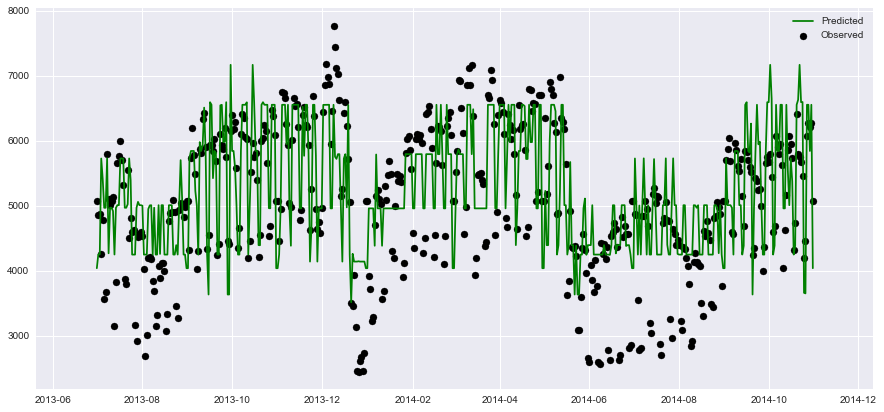

In [328]:
#Plot observed and Predicted electricity value 
fig = plt.figure(figsize=(15,7))
plt.scatter(X_test.index, y_test, label='Observed', color='k')
plt.plot(X_test.index, y_lr, label='Predicted', color='g')
plt.legend(loc='upper right')

**(Bonus) Exo 8: Can you train a Neural Network for the steam data? is it better?**

In [28]:
X = df[all_features]
y = df['steam-LBS']
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape

(547, 15)

In [29]:
from sklearn.neural_network import MLPRegressor
nn_elect = MLPRegressor(
    hidden_layer_sizes=(10, ), 
    activation='logistic', 
    solver='lbfgs', 
    alpha=0.001,
    random_state=1
)

In [30]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train)  
# apply same transformation to test data
X_test_scaled = scaler.transform(X_test) 

In [31]:
# Set the parameters by cross-validation
from sklearn.model_selection import GridSearchCV
tuned_parameters = {
    'hidden_layer_sizes': [(10,), (5,), (15, )],
    'activation': ['relu', 'tanh', 'logistic'], 
    'alpha': 10.0 ** -np.arange(1, 7)}
grid = GridSearchCV(nn_elect, cv=3, n_jobs=2, param_grid=tuned_parameters)

In [32]:
grid.fit(X_train_scaled, y_train.values.reshape(-1, ))

GridSearchCV(cv=3, error_score='raise',
       estimator=MLPRegressor(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'hidden_layer_sizes': [(10,), (5,), (15,)], 'activation': ['relu', 'tanh', 'logistic'], 'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
grid.best_params_

{'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (15,)}

In [34]:
y_lr = grid.best_estimator_.predict(X_test_scaled)

print("The test score R2: ", grid.best_estimator_.score(X_test_scaled, y_test))

The test score R2:  0.8184465598867643


In [35]:
nn_elect.fit(X_train_scaled, y_train.values.reshape(-1, ))
y_lr = nn_elect.predict(X_test_scaled)

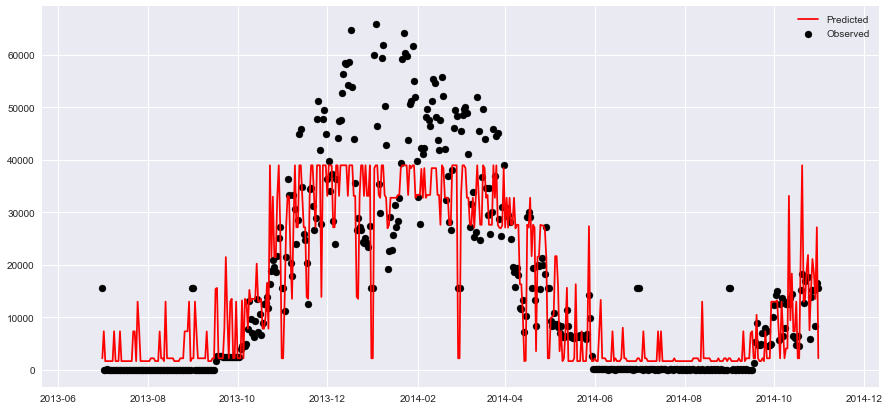

In [36]:
#Plot observed and Predicted electricity value 
fig = plt.figure(figsize=(15,7))
plt.scatter(X_test.index, y_test, label='Observed', color='k')
plt.plot(X_test.index, y_lr, label='Predicted', color='r')
plt.legend(loc='upper right')